# Stunting Project

## Import Library

In [1]:
# Meng-import library yang dibutuhkan
import numpy as np # Linear Algebra
import pandas as pd # Data Processing, CSV file I/O (ex: pd.read_csv)
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# Import Classifier library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Import library lainnya
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Membuat Dataframe

In [2]:
# Membaca dataset dan mengubahnya menjadi dataframe
df = pd.read_csv("stunting_data_.csv")
df.head()

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,_zlen,Status Stunting
0,3.3,1,1,1,8.5,79.2,6,12,1,0,1,0,0,680333.3,383777.8,435500.0,2.289686,0
1,4.1,1,1,1,11.2,77.9,9,12,1,0,0,0,0,784333.3,408861.1,732333.3,1.204116,0
2,4.0,1,1,1,11.4,85.0,12,12,1,0,1,1,0,496166.7,580944.4,117000.0,4.270555,0
3,3.5,1,1,1,10.0,95.2,12,17,1,1,1,1,0,2415833.0,1704972.0,721500.0,8.232287,0
4,1.8,0,1,1,9.5,77.0,12,12,1,0,0,1,0,2442267.0,1001087.0,1787933.0,1.163313,0


In [3]:
# Drop kolom yang tidak digunakan
df.drop(columns=["_zlen"], inplace=True)
df.head()

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,Status Stunting
0,3.3,1,1,1,8.5,79.2,6,12,1,0,1,0,0,680333.3,383777.8,435500.0,0
1,4.1,1,1,1,11.2,77.9,9,12,1,0,0,0,0,784333.3,408861.1,732333.3,0
2,4.0,1,1,1,11.4,85.0,12,12,1,0,1,1,0,496166.7,580944.4,117000.0,0
3,3.5,1,1,1,10.0,95.2,12,17,1,1,1,1,0,2415833.0,1704972.0,721500.0,0
4,1.8,0,1,1,9.5,77.0,12,12,1,0,0,1,0,2442267.0,1001087.0,1787933.0,0


In [4]:
df.shape

(1561, 17)

In [5]:
df.describe()

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,Status Stunting
count,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1561.000000,1.561000e+03,1.561000e+03,1.561000e+03,1561.000000
mean,3.137079,0.923126,0.964126,2.527867,12.732415,89.186996,9.756566,9.707880,0.937860,0.358104,0.610506,0.803331,0.012172,1.907425e+06,9.715076e+05,1.228660e+06,0.170404
std,0.678774,0.266476,0.186037,1.417618,4.283563,15.041222,3.931912,3.731776,0.241486,0.479597,0.487792,0.397607,0.109687,1.163948e+06,7.576923e+05,8.611684e+05,0.376107
min,1.000000,0.000000,0.000000,1.000000,2.500000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.450000e+04,1.316429e+05,0.000000e+00,0.000000
25%,2.800000,1.000000,1.000000,1.000000,9.700000,79.000000,6.000000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.137933e+06,5.509444e+05,6.803334e+05,0.000000
50%,3.100000,1.000000,1.000000,2.000000,12.500000,90.800000,9.000000,9.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.635833e+06,7.968888e+05,1.035667e+06,0.000000
75%,3.500000,1.000000,1.000000,4.000000,15.100000,101.200000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.374667e+06,1.129438e+06,1.575167e+06,0.000000
max,9.990000,1.000000,1.000000,5.000000,36.600000,126.500000,22.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.190000e+07,1.410000e+07,1.260000e+07,1.000000


In [6]:
# Check null
df.isnull().sum().max()

0

In [7]:
# Nama kolom/variabel
df.columns

Index(['Berat Lahir (kg)', 'Status Premature', 'ASI', 'Usia', 'Berat (kg)',
       'Tinggi (cm)', 'Pendidikan Ayah', 'Pendidikan Ibu', 'Pekerjaan Ayah',
       'Pekerjaan Ibu', 'Air', 'Toilet', 'Merokok', 'hhfood', 'xprotein',
       'pce', 'Status Stunting'],
      dtype='object')

In [8]:
# Check p-value
import statsmodels.api as sm
# Jika p-value < 0.05 --> Significant
# Jika p-value > 0.05 --> Not Significant

p_data_target=df['Status Stunting']
p_data_features=df.drop('Status Stunting', axis=1)

X_train,X_test, Y_train, Y_test = train_test_split(p_data_features, p_data_target, test_size = .2, random_state = 10)

x_incl_cons = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_cons)  #ordinary least square
results = model.fit()  #regresssion results

pvalue_ = pd.DataFrame({'coef': results.params , 'pvalue': round(results.pvalues,3)})
pvalue_.to_csv('pvalue.csv')
pvalue_

,coef,pvalue
const,2.577545e+00,0.000
Berat Lahir (kg),1.890672e-03,0.883
Status Premature,-1.857627e-02,0.563
ASI,-1.581701e-04,0.997
Usia,2.429337e-01,0.000
Berat (kg),1.840558e-02,0.000
Tinggi (cm),-3.697595e-02,0.000
Pendidikan Ayah,8.139430e-03,0.001
Pendidikan Ibu,-6.130659e-03,0.016
Pekerjaan Ayah,4.070678e-02,0.194


In [9]:
# Check target data
print('Not Stunting', round(df['Status Stunting'].value_counts()[0]/len(df) * 100,2), '% dari dataset')
print('Stunting', round(df['Status Stunting'].value_counts()[1]/len(df) * 100,2), '% dari dataset')

Not Stunting 82.96 % dari dataset
Stunting 17.04 % dari dataset


In [10]:
df["Status Stunting"].value_counts()

0    1295
1     266
Name: Status Stunting, dtype: int64

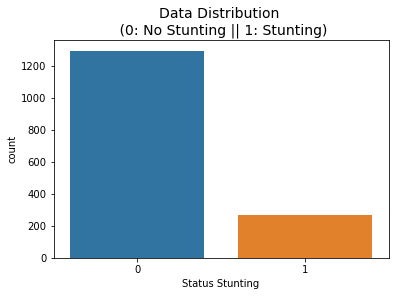

In [11]:
sns.countplot(x="Status Stunting", data=df)
plt.title("Data Distribution \n (0: No Stunting || 1: Stunting)", fontsize=14)
plt.savefig("Distribusi Data Stunting.png")

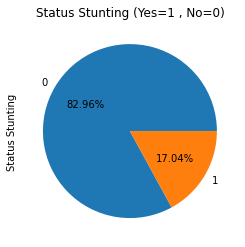

In [12]:
df["Status Stunting"].value_counts().plot(kind='pie', autopct='%.2f%%')
plt.title('Status Stunting (Yes=1 , No=0)')
plt.savefig("Distribusi Data Stunting 2.png")
plt.show()

Terlihat dari distribusi data di atas bahwa adanya data imbalance. Jika kita menggunakan data ini sebagai basis pembuatan model prediksi dan analisis maka kita akan mendapatkan banyak error dan algoritma kita kemungkinkan akan terkena overfit karena model akan "berasumsi" bahwa kebanyakan data adalah Not Stunting. Kita tidak ingin model untuk "berasumsi", kita ingin membuat model yang dapat mendeteksi pattern/pola yang memberikan kita hasil Stunting.

# Cronbach Alpha

In [13]:
# Melakukan scaling dan menyimpannya dalam sub-sample
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
df_rob = rob_scaler.fit_transform(df)
df = pd.DataFrame(df_rob, columns=df.columns)
df.head()

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,Status Stunting
0,0.285714,0.0,0.0,-0.333333,-0.740741,-0.522523,-0.5,0.500000,0.0,0.0,0.0,-1.0,0.0,-0.772599,-0.714115,-0.670702,0.0
1,1.428571,0.0,0.0,-0.333333,-0.240741,-0.581081,0.0,0.500000,0.0,0.0,-1.0,-1.0,0.0,-0.688507,-0.670755,-0.338983,0.0
2,1.285714,0.0,0.0,-0.333333,-0.203704,-0.261261,0.5,0.500000,0.0,0.0,0.0,0.0,0.0,-0.921513,-0.373287,-1.026634,0.0
3,0.571429,0.0,0.0,-0.333333,-0.462963,0.198198,0.5,1.333333,0.0,1.0,0.0,0.0,0.0,0.630693,1.569738,-0.351090,0.0
4,-1.857143,-1.0,0.0,-0.333333,-0.555556,-0.621622,0.5,0.500000,0.0,0.0,-1.0,0.0,0.0,0.652067,0.352983,0.840677,0.0


In [14]:
# Uji realibilitas data menggunakan Cronbach Alpha
import pingouin as pg

print("Robust Scaler:",pg.cronbach_alpha(data=df))

Robust Scaler: (0.5941306497586668, array([0.564, 0.623]))


# Splitting Data (Original Dataframe)

Dalam mengatasi data imbalance, kita dapat menggunakan beberapa teknik: Random UnderSampling dan OverSampling. Namun, sebelum kita menerapkan teknik-tenik tersebut, kita harus memisahkan dataframe original yang akan digunakan. Hal ini dilakukan dengan tujuan testing nanti, di mana yang kita inginkan adalah bahwa model kita melakukan testing set pada data original, bukan pada testing test yang dibuat oleh teknik-teknik yang akan digunakan (Random UnderSampling/OverSampling). Goal/tujuan utama kita adalah untuk melakukan model fitting pada dataframe yang telah di UnderSample dan Oversample, lalu melakukan test pada original testing set.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Not Stunting', round(df['Status Stunting'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Stunting', round(df['Status Stunting'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Status Stunting', axis=1)
y = df['Status Stunting']

Not Stunting 82.96 % of the dataset
Stunting 17.04 % of the dataset


In [16]:
# Menggunakan Stratified KFold agar sampling distribusi data lebih merata
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Ubah ke bentuk array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Cek apakah distribusi label train dan test telah terdistribusi dengan baik
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

Train: [ 309  311  312 ... 1558 1559 1560] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [17]:
print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Label Distributions: 

[0.82946357 0.17053643]
[0.83012821 0.16987179]


# Random UnderSampling

Kita akan menerapkan teknik "Random UnderSampling", yang secara umum berarti menghilangkan beberapa data sehingga kita memiliki dataset yang lebih balance dengan tujuan menghindari model mengalami overfitting.

Langkah yang dilakukan:
- Tentukan seberapa imbalance data dalam dataset
- Tentukan seberapa banyak data "Not Stunting" dan "Stunting" dalam data, kita harus mengambil jumlah "Not Stunting" sebesar jumlah data "Stunting", sehingga jika terdapat 266 data "Stunting" maka akan ada 266 data "Not Stunting"
- Setelah mengimplementasikan teknik ini, kita memiliki sub-sample dari dataframe dengan rasio 50/50 berdasarkan target data (Status Stunting). Berikutnya yang akan kita implementasikan adalah "shuffle data" untuk melihat apakah model kita mampu menjaga akurasi setiap kali skrip kodingan dijalankan

Yang harus diperhatikan: Masalah utama dalam "Random UnderSampling" adalah resiko bahwa model klasifikasi kita tidak perform seakurat yang kita inginkan karena terdapat banyak informasi yang hilang (kita hanya mengambil 266 data Not Stunting dari total 1295 data)

In [18]:
# Lakukan shuffling data sebelum membuat subsample

df = df.sample(frac=1).reset_index(drop=True)

# Jumlah data Stunting 266
stunting_df = df.loc[df['Status Stunting'] == 1]
not_stunting_df = df.loc[df['Status Stunting'] == 0][:266]

normal_distributed_df = pd.concat([stunting_df, not_stunting_df])

# Shuffle baris dataframe
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Berat Lahir (kg),Status Premature,ASI,Usia,Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ayah,Pekerjaan Ibu,Air,Toilet,Merokok,hhfood,xprotein,pce,Status Stunting
67,-0.142857,0.0,0.0,0.666667,0.240741,0.108108,-0.500000,-0.833333,0.0,1.0,0.0,0.0,0.0,1.264891,-0.342446,0.765132,1.0
258,0.285714,0.0,0.0,-0.333333,-0.537037,-0.567568,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,1.455851,1.099470,1.196125,0.0
644,-0.428571,0.0,0.0,1.000000,0.796296,-0.049550,-0.500000,-0.500000,0.0,0.0,-1.0,-1.0,0.0,1.182551,0.782685,0.726392,1.0
256,-0.571429,0.0,0.0,-0.333333,-0.796296,-0.959459,0.000000,-0.500000,0.0,0.0,0.0,-1.0,0.0,-0.707778,-0.784677,-0.210654,0.0
212,0.428571,0.0,0.0,0.666667,0.500000,0.815315,0.500000,-0.500000,0.0,0.0,0.0,0.0,0.0,0.501051,0.469563,1.322034,0.0


# Distribusi Merata dan Korelasi

Setelah membuat dataframe seimbang, kita bisa melakukan analisis dan data preprocessing

Distribution Data dalam SubSample dataset
1.0    0.5
0.0    0.5
Name: Status Stunting, dtype: float64


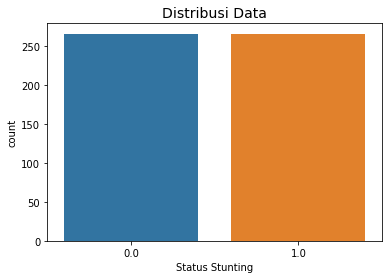

In [19]:
print('Distribution Data dalam SubSample dataset')
print(new_df['Status Stunting'].value_counts()/len(new_df))

sns.countplot('Status Stunting', data=new_df)
plt.title('Distribusi Data', fontsize=14)
plt.savefig("Distribusi Data Stunting Setelah Undersampling.png")
plt.show()

Untuk lebih memahami data yang ada, kita dapat menggunakan Correlation Matrix. Kita ingin mengetahui apakah ada fitur yang sangat menginfluens terhadap status stunting. Namun, penting juga bagi kita untuk menggunakan dataframe yang benar (subsample) dengan tujuan agar kita dapat melihat fitur mana yang memiliki korelasi positif/negatif yang tinggi terhadap status stunting.

# Correlation Matrix

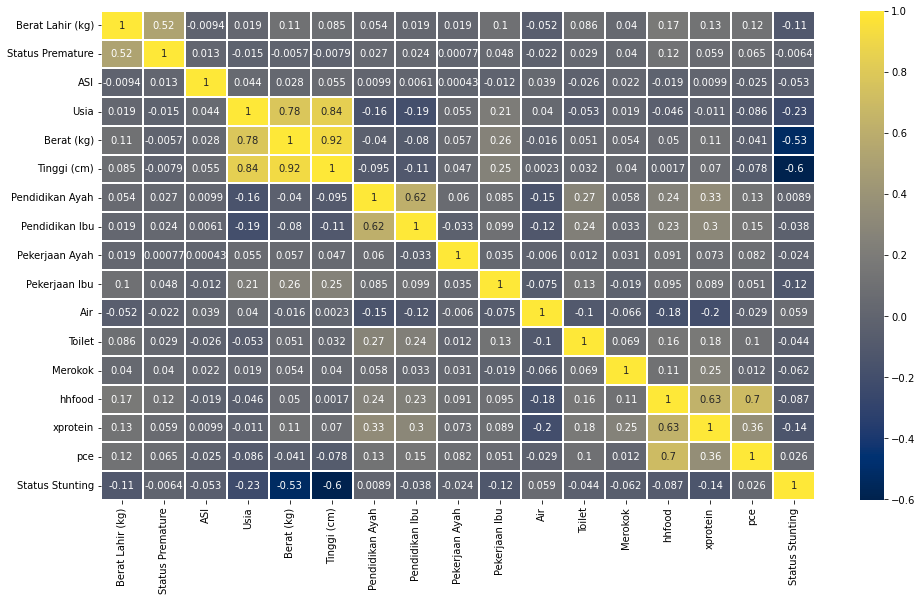

In [20]:
# Correlation matrix dari subsample dataframe

plt.figure(figsize=(16,9))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr,cmap ='cividis',linewidth = 0.30, annot = True)
plt.savefig("Correlation Matrix Antar Variabel.png")
plt.show()

# Boxplot

Dengan menggunakan boxplot kita dapat melihat fitur-fitur mana yang divergen terhadap distribusi normal

Berat Lahir (kg)
2.948881111020701


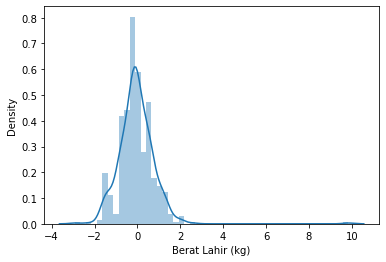

Status Premature
-2.7454328720711256


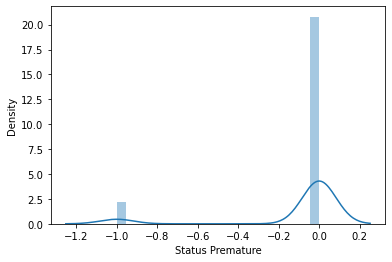

ASI
-5.322323492216223


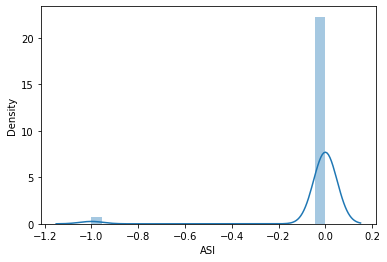

Usia
0.6211910962044835


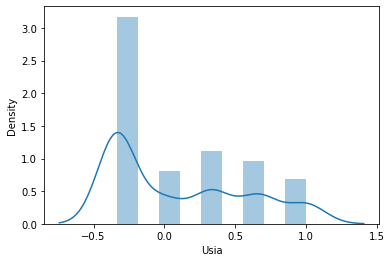

Berat (kg)
0.33270299282337645


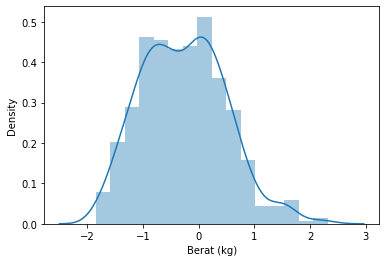

Tinggi (cm)
-0.11960020994835323


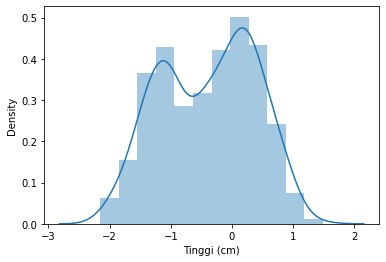

Pendidikan Ayah
0.05761103048540084


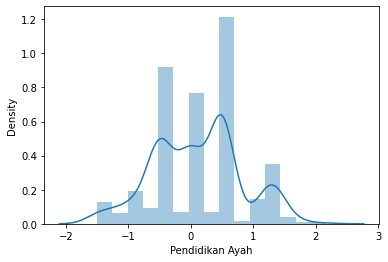

Pendidikan Ibu
0.18431380791076737


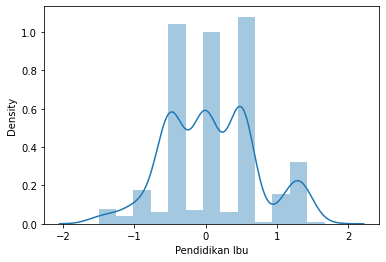

Pekerjaan Ayah
-3.7713613682708313


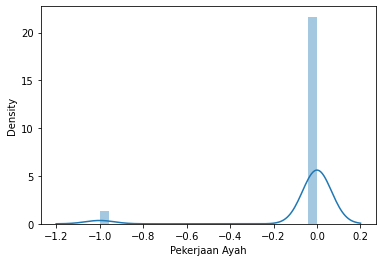

Pekerjaan Ibu
0.7555137547336457


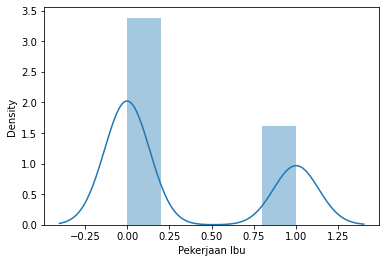

Air
-0.5539315328106204


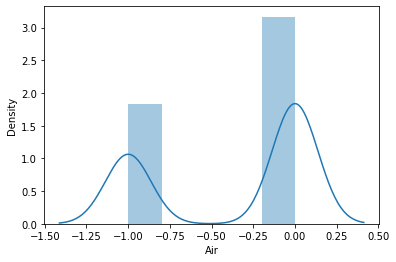

Toilet
-1.237968921180346


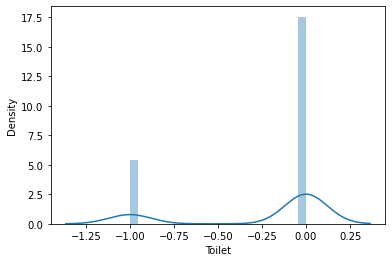

Merokok
7.96964661547628


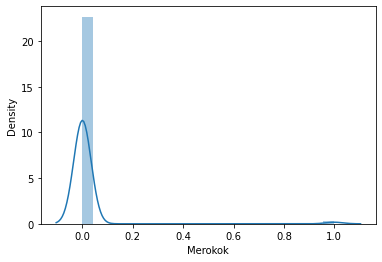

hhfood
1.8697894489335094


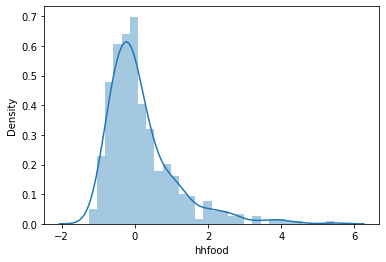

xprotein
6.671238141378589


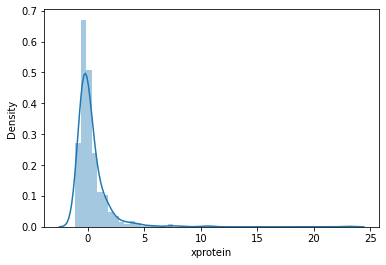

pce
2.4195452981469474


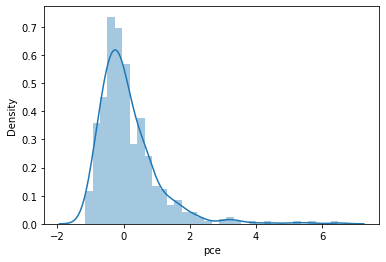

Status Stunting
0.0


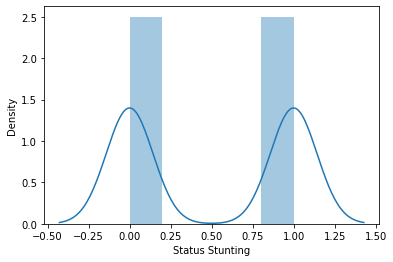

In [21]:
# Skewness
from scipy.stats import skew

for col in new_df:
    print(col)
    print(skew(new_df[col]))
    
    plt.figure()
    sns.distplot(new_df[col])
    plt.show()

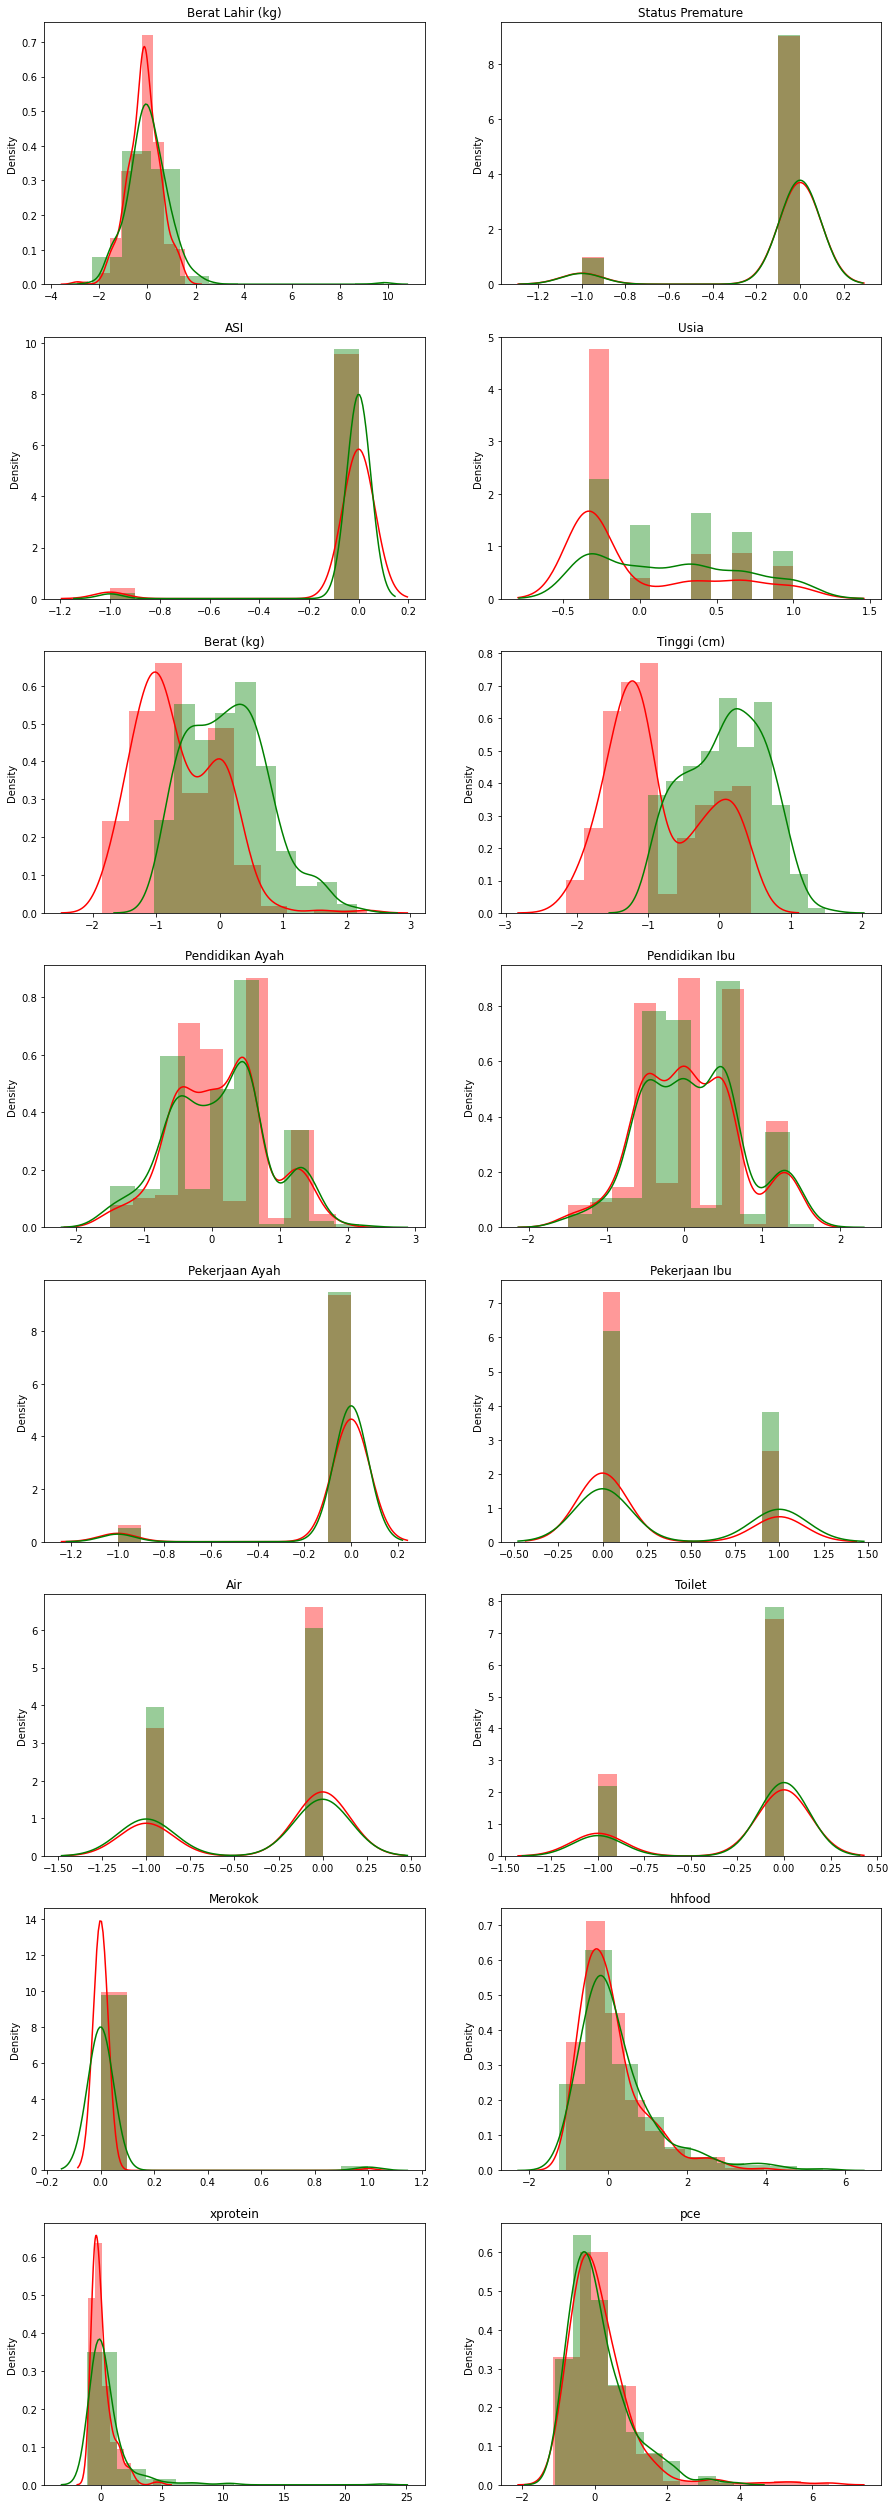

In [22]:
# Melihat fitur-fitur
import matplotlib.gridspec as gridspec

columns = df.iloc[:,:16].columns

stunting = new_df["Status Stunting"] == 1
not_stunting = new_df["Status Stunting"] == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(new_df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(new_df[col][stunting], bins = 10, color='r') #Will receive the "semi-salmon" violin
    sns.distplot(new_df[col][not_stunting], bins = 10, color='g') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

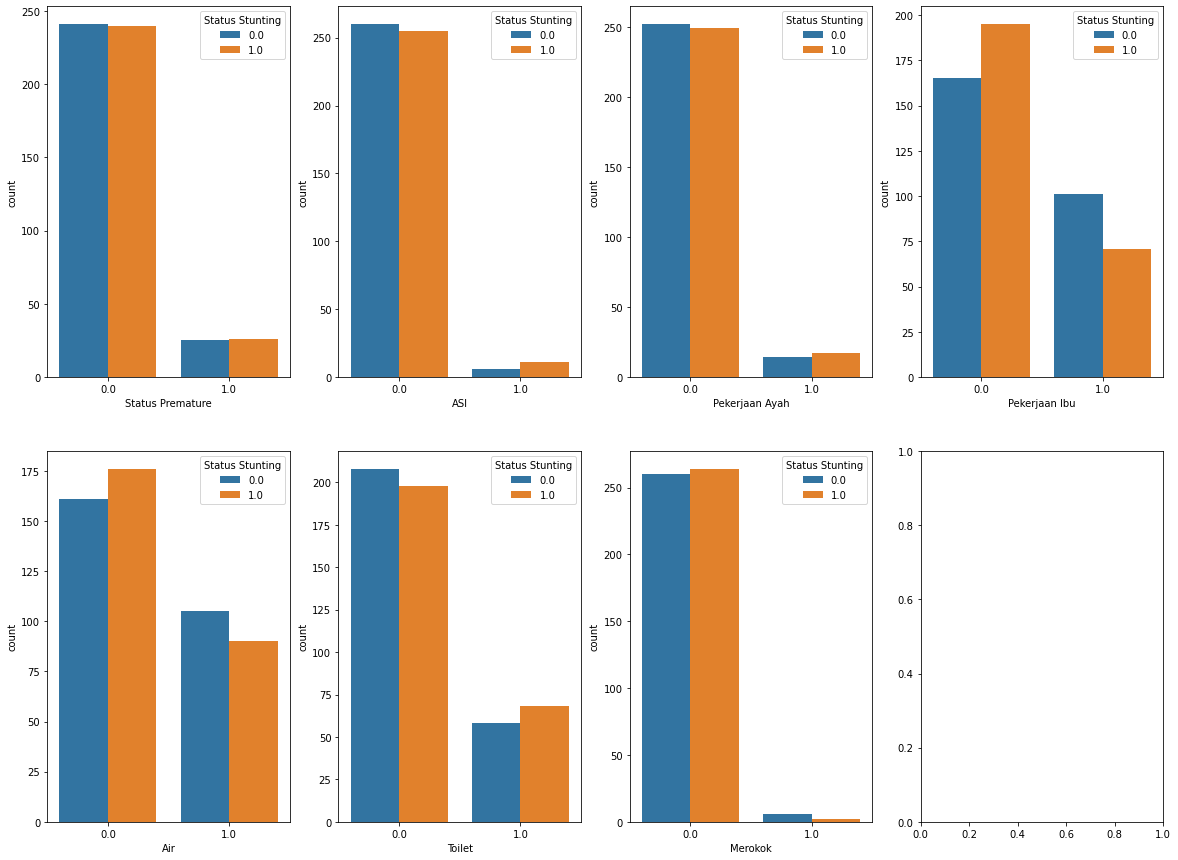

In [23]:
# Plot data-data ordinal
cat_var = ["Status Premature", "ASI", "Pekerjaan Ayah", "Pekerjaan Ibu", "Air", "Toilet", "Merokok"]

fig, axes = plt.subplots(2, 4, figsize=(20, 15))

for cat, ax in zip(cat_var, axes.flatten()):
    sns.countplot(cat, data=abs(new_df), hue="Status Stunting", ax=ax)

# Anomaly Detection (Extreme Outlier)

Cek distribusi data stunting dari fitur berkorelasi seperti "Usia", "Berat", dan "Tinggi"

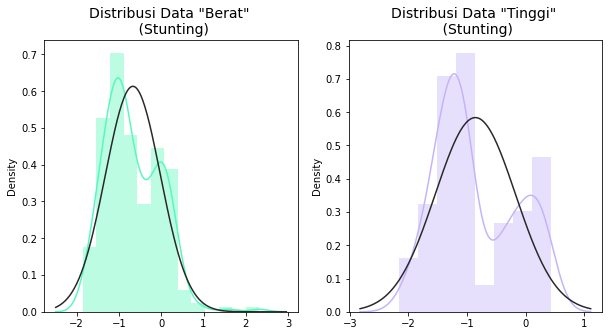

In [24]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

v12_fraud_dist = new_df['Berat (kg)'].loc[new_df['Status Stunting'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax1, fit=norm, color='#56F9BB')
ax1.set_title('Distribusi Data "Berat" \n (Stunting)', fontsize=14)


v10_fraud_dist = new_df['Tinggi (cm)'].loc[new_df['Status Stunting'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax2, fit=norm, color='#C5B3F9')
ax2.set_title('Distribusi Data "Tinggi" \n (Stunting)', fontsize=14)

plt.show()

Menghilangkan outlier dari fitur berkorelasi seperti "Usia", "Berat", dan "Tinggi"

In [25]:
# Menghilangkan outlier fitur "Berat"
berat_stunting = new_df['Berat (kg)'].loc[new_df['Status Stunting'] == 1].values
q25, q75 = np.percentile(berat_stunting, 25), np.percentile(berat_stunting, 75)
berat_iqr = q75 - q25

berat_cut_off = berat_iqr * 1.5
berat_lower, berat_upper = q25 - berat_cut_off, q75 + berat_cut_off
print('"Berat" Lower: {}'.format(berat_lower))
print('"Berat" Upper: {}'.format(berat_upper))

outliers = [x for x in berat_stunting if x < berat_lower or x > berat_upper]
print('"Berat" outliers: {}'.format(outliers))
print('Outlier dari Fitur "Berat" yang Stunting: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['Berat (kg)'] > berat_upper) | (new_df['Berat (kg)'] < berat_lower)].index)
print('Jumlah Instances setelah penghapusan outlier: {}'.format(len(new_df)))
print('----' * 20)


# Menghilangkan outlier fitur "Tinggi"
tinggi_stunting = new_df['Tinggi (cm)'].loc[new_df['Status Stunting'] == 1].values
q25, q75 = np.percentile(tinggi_stunting, 25), np.percentile(tinggi_stunting, 75)
tinggi_iqr = q75 - q25

tinggi_cut_off = tinggi_iqr * 1.5
tinggi_lower, tinggi_upper = q25 - tinggi_cut_off, q75 + tinggi_cut_off
print('"Tinggi" Lower: {}'.format(tinggi_lower))
print('"Tinggi" Upper: {}'.format(tinggi_upper))

outliers = [x for x in tinggi_stunting if x < tinggi_lower or x > tinggi_upper]
print('"Tinggi" outliers: {}'.format(outliers))
print('Outlier dari Fitur "Tinggi" yang Stunting: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['Tinggi (cm)'] > tinggi_upper) | (new_df['Tinggi (cm)'] < tinggi_lower)].index)
print('Jumlah Instances setelah penghapusan outlier: {}'.format(len(new_df)))

"Berat" Lower: -2.75
"Berat" Upper: 1.4351851851851851
"Berat" outliers: [2.314814814814815, 1.5925925925925928]
Outlier dari Fitur "Berat" yang Stunting: 2
Jumlah Instances setelah penghapusan outlier: 518
--------------------------------------------------------------------------------
"Tinggi" Lower: -3.098536036036035
"Tinggi" Upper: 1.4825450450450444
"Tinggi" outliers: []
Outlier dari Fitur "Tinggi" yang Stunting: 0
Jumlah Instances setelah penghapusan outlier: 518


Menggunakan:
- T-SNE algorithm
- PCA
- Truncated SVD

# Dimensionality Reduction & Clustering

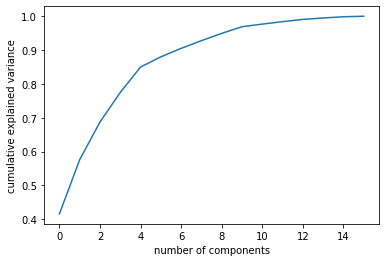

In [26]:
# Cek n_component yang akan digunakan pada PCA
X = new_df.drop('Status Stunting', axis=1)
y = new_df['Status Stunting']

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.savefig("Plot Varians Kumulatif Variabel Dataset Stunting.png")

In [27]:
print(pca.explained_variance_ratio_)

[0.41545295 0.16052148 0.11132191 0.08752895 0.07507881 0.03012648
 0.02499649 0.02282077 0.02150874 0.01969953 0.00773586 0.00718195
 0.00667496 0.0042155  0.00358401 0.0015516 ]


In [28]:
pca_df = pd.DataFrame(abs(pca.components_))
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.083313,0.017033,0.000571,0.021730,0.003964,0.004843,0.155230,0.130889,0.011961,0.030594,0.063944,0.050793,0.013371,0.411731,0.832111,0.284906
1,0.139750,0.016563,0.005885,0.357748,0.584084,0.649950,0.143044,0.130926,0.012014,0.125083,0.002986,0.000929,0.004842,0.047615,0.110954,0.143468
2,0.370169,0.076140,0.006324,0.030323,0.049300,0.037852,0.161345,0.127683,0.017311,0.043650,0.052937,0.011151,0.015504,0.435816,0.425613,0.658458
3,0.845707,0.163450,0.000373,0.086186,0.034614,0.077342,0.284556,0.227277,0.008203,0.050734,0.049901,0.078519,0.001228,0.165793,0.016014,0.267930
4,0.281284,0.051968,0.001752,0.071652,0.176543,0.177782,0.628482,0.551777,0.006635,0.127536,0.025424,0.149728,0.014622,0.079769,0.282227,0.158799
5,0.053531,0.004579,0.019794,0.053280,0.003348,0.049314,0.024643,0.130126,0.000390,0.197616,0.790666,0.095523,0.008255,0.422575,0.145291,0.317526
6,0.024729,0.026690,0.013469,0.071752,0.054872,0.083462,0.224294,0.053031,0.012910,0.792041,0.069877,0.300105,0.005594,0.375104,0.083349,0.245206
7,0.034069,0.029498,0.005477,0.044247,0.027997,0.059048,0.211852,0.217683,0.035629,0.351829,0.541773,0.008969,0.011529,0.525508,0.071568,0.446519
8,0.019093,0.033362,0.002165,0.002663,0.004007,0.052308,0.529574,0.706197,0.074811,0.145354,0.253967,0.337589,0.003746,0.078463,0.007217,0.071988
9,0.004288,0.011022,0.010407,0.064460,0.041832,0.042700,0.270375,0.139436,0.030567,0.387383,0.023997,0.863686,0.014523,0.028753,0.013966,0.026781


In [29]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=7, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=7, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.6 s
PCA took 0.016 s
Truncated SVD took 0.0039 s


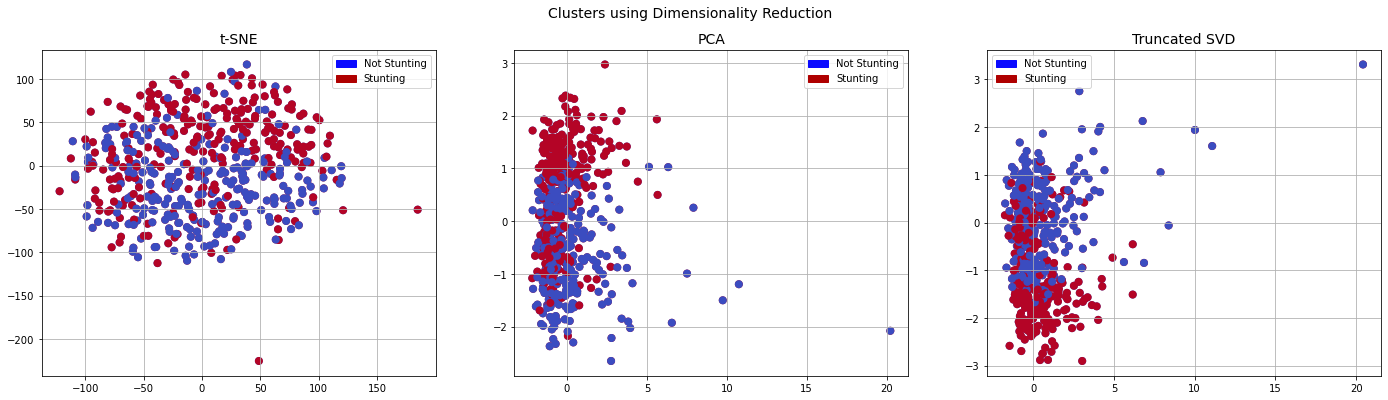

In [30]:
# Melihat Scatterplot masing-masing algoritma
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['Not Stunting', 'Stunting']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Stunting')
red_patch = mpatches.Patch(color='#AF0000', label='Stunting')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not Stunting', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Stunting', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not Stunting', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Stunting', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Not Stunting', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Stunting', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [31]:
#Principal component values
X_reduced_pca_DF = pd.DataFrame(data = X_reduced_pca, columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
X_reduced_pca_DF

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-0.098683,-0.946468,-1.471961,-0.859125,0.137104,-0.304170,-0.238941
1,1.542158,0.485321,-1.032062,-0.173172,0.158749,0.222913,0.343977
2,0.790717,-1.217317,-0.729466,-1.134100,0.360979,-0.579526,0.684665
3,-1.529943,0.825220,0.278289,-0.332560,0.427682,0.378781,0.255490
4,0.634642,-1.372203,-1.163682,-0.165528,-0.356867,0.643649,0.356344
...,...,...,...,...,...,...,...
513,-1.043758,-1.550686,-0.631524,0.133693,0.402963,0.470606,-0.409419
514,0.059318,2.077016,0.266346,0.002435,0.172808,-0.660948,0.079429
515,0.325367,0.083422,-1.881521,-0.715070,0.131730,0.691963,0.216565
516,-0.710450,-2.327083,0.307070,-0.363736,0.297093,0.319675,-0.226899


In [32]:
new_df["Status Stunting"]

67     1.0
258    0.0
644    1.0
256    0.0
212    0.0
      ... 
457    1.0
649    1.0
4      0.0
196    0.0
640    1.0
Name: Status Stunting, Length: 518, dtype: float64

In [33]:
X_reduced_pca_DF.reset_index(drop=True, inplace=True)
new_df["Status Stunting"].reset_index(drop=True, inplace=True)
finalDf = pd.concat([X_reduced_pca_DF, new_df["Status Stunting"]], axis = 1)
finalDf.to_csv("finalDF.csv")
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Status Stunting
0,-0.098683,-0.946468,-1.471961,-0.859125,0.137104,-0.304170,-0.238941,1.0
1,1.542158,0.485321,-1.032062,-0.173172,0.158749,0.222913,0.343977,0.0
2,0.790717,-1.217317,-0.729466,-1.134100,0.360979,-0.579526,0.684665,1.0
3,-1.529943,0.825220,0.278289,-0.332560,0.427682,0.378781,0.255490,0.0
4,0.634642,-1.372203,-1.163682,-0.165528,-0.356867,0.643649,0.356344,0.0
...,...,...,...,...,...,...,...,...
513,-1.043758,-1.550686,-0.631524,0.133693,0.402963,0.470606,-0.409419,1.0
514,0.059318,2.077016,0.266346,0.002435,0.172808,-0.660948,0.079429,1.0
515,0.325367,0.083422,-1.881521,-0.715070,0.131730,0.691963,0.216565,0.0
516,-0.710450,-2.327083,0.307070,-0.363736,0.297093,0.319675,-0.226899,0.0


# Pembuatan Model (UnderSampling)

In [34]:
# Undersampling sebelum cross validating (cenderung overfit)
X = new_df.drop('Status Stunting', axis=1)
y = new_df['Status Stunting']

In [35]:
# Karena data telah di scaled, kita akan bagi data menjadi training dan test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Ubah nilai menjadi array yang akan digunakan pada algoritma klasifikasi
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [37]:
# Implementasikan pada beberapa algoritma klasifikasi

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [38]:
# Menerapkan cross validation untuk meningkatkan hasil skor
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=3)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2)
          * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 89.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 73.0 % accuracy score
Classifiers:  SVC Has a training score of 80.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [39]:
# Gunakan GridSearchCV untuk menemukan parameter terbaik
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# Mendapatkan parameter terbaik untuk logistic regression
log_reg = grid_log_reg.best_estimator_

# KNN
knears_params = {"n_neighbors": list(range(1, 51)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# Parameter terbaik KNN
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier (SVC)
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# Parameter terbaik SVC
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
# Parameter terbaik DecisionTree
tree_clf = grid_tree.best_estimator_

In [40]:
# Cek Performa
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=3)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=3)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=3)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=3)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.72%
Knears Neighbors Cross Validation Score 72.46%
Support Vector Classifier Cross Validation Score 90.82%
DecisionTree Classifier Cross Validation Score 84.54%


In [41]:
# Melakukan Undersample ketika cross validating
undersample_X = df.drop('Status Stunting', axis=1)
undersample_y = df['Status Stunting']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Mengimplementasikan teknik NearMiss 
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)

# Distribusi dari NearMiss (Hanya untuk melihat bagaimana distribusi labelnya, variablenya tidak akan digunakan)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

# Melakukan Cross Validating
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE terjadi saat Cross Validation, bukan sebelumnya
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 302  303  304 ... 1558 1559 1560] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [42]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("K-Nears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

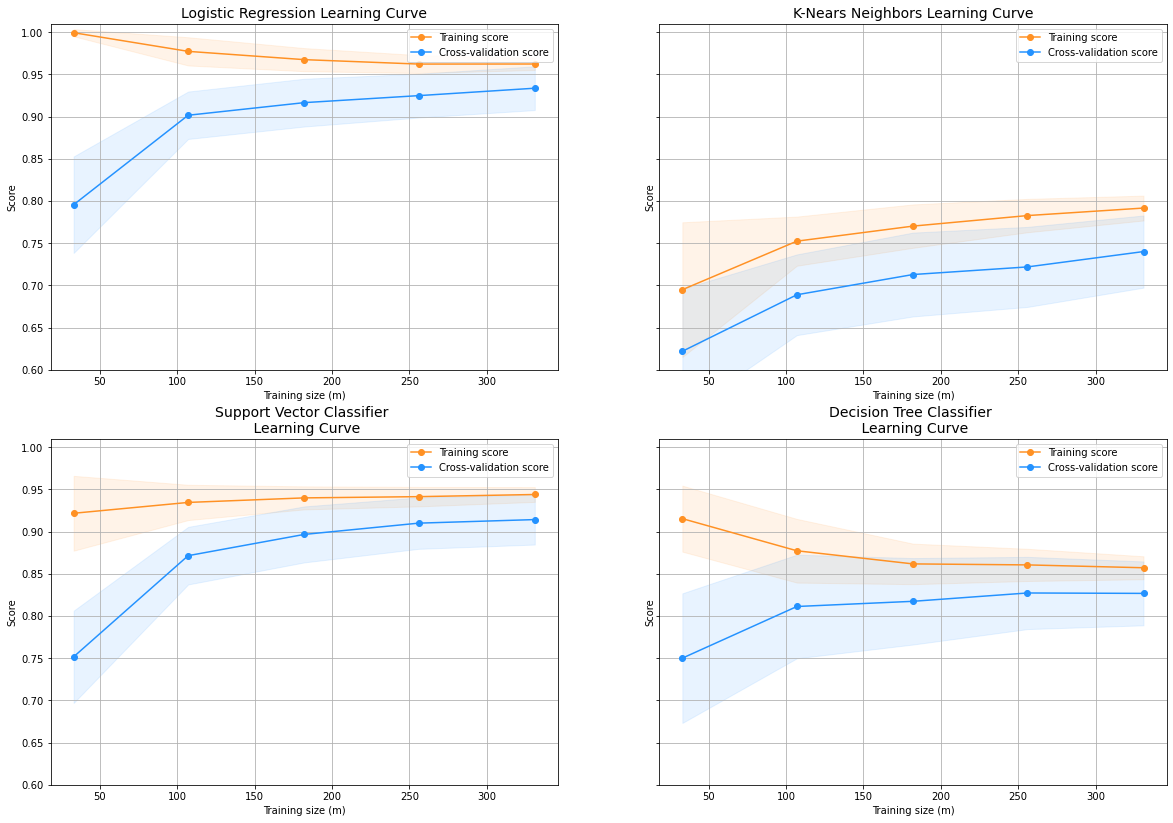

In [43]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.6, 1.01), cv=cv, n_jobs=4)
plt.savefig("Learning Curve.png")

In [44]:
# Membaut DataFrame dengan semua skor dan nama-nama classifier yang digunakan
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict


log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [45]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9860154553731936
KNears Neighbors:  0.7531576121214951
Support Vector Classifier:  0.981859781009969
Decision Tree Classifier:  0.8402400018677189


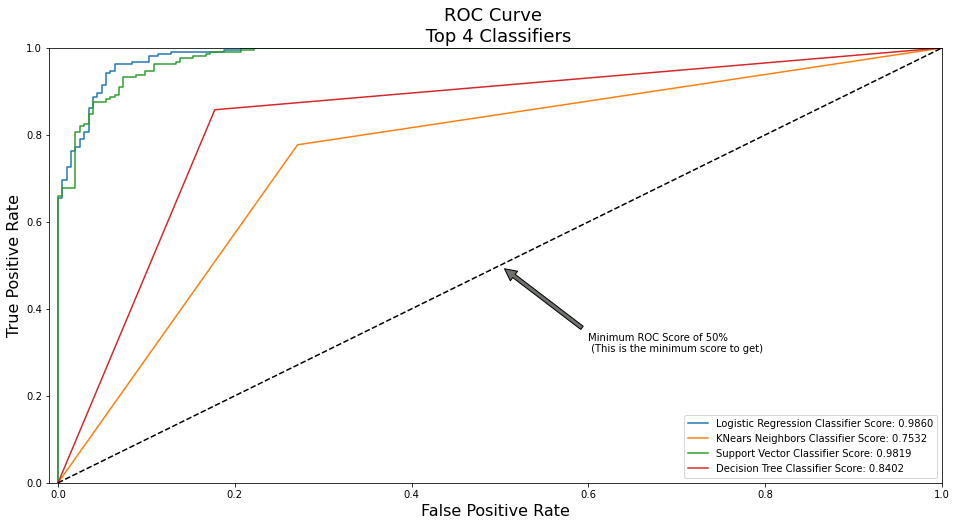

In [46]:
# Membuat grafik kurva ROC
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.savefig("Kurva ROC.png")
plt.show()


# Prediksi Confidence Score

In [47]:
# Gunakan PC dari hasil PCA untuk di-fit terhadap model yang telah dibangun
X_reduced_pca_DF.reset_index(drop=True, inplace=True)
new_df["Status Stunting"].reset_index(drop=True, inplace=True)
finalDf = pd.concat([X_reduced_pca_DF, new_df["Status Stunting"]], axis = 1)

Xfinal=finalDf[['pc1','pc2','pc3','pc4','pc5','pc6','pc7']]
yfinal=finalDf['Status Stunting']
Xfinal_train, Xfinal_test, yfinal_train, yfinal_test = train_test_split(Xfinal,yfinal,test_size=0.3)
log_reg.fit(X=Xfinal_train,y=yfinal_train)
log_reg.predict(Xfinal_test)
score_acc=log_reg.score(Xfinal_test,yfinal_test)
score_acc

0.6538461538461539

In [48]:
#Buat data untuk testing confidence score berdasarkan variabel PCA (PC1-PC7)
testing_data = [[2.60515142040471,0.899717578187786,-1.22579427056915,1.1331746127489,0.0426013443947231,-0.905881574838977,-0.397711290386408],
                [-1.30746133163944,-0.598304569321191,0.228513836351343,0.441756142183713,-0.674661081191546,-0.568209574185916,0.604331925247189]
               ]
data_pred = pd.DataFrame(testing_data, index=["data 1", "data 2"], columns=Xfinal.columns)
data_pred

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
data 1,2.605151,0.899718,-1.225794,1.133175,0.042601,-0.905882,-0.397711
data 2,-1.307461,-0.598305,0.228514,0.441756,-0.674661,-0.568210,0.604332


In [49]:
print(log_reg.predict(data_pred))
print(log_reg.predict_proba(data_pred))

[1. 0.]
[[0.32304295 0.67695705]
 [0.68973747 0.31026253]]


In [50]:
data_pred["Status Stunting"] = log_reg.predict(data_pred)
data_pred

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Status Stunting
data 1,2.605151,0.899718,-1.225794,1.133175,0.042601,-0.905882,-0.397711,1.0
data 2,-1.307461,-0.598305,0.228514,0.441756,-0.674661,-0.568210,0.604332,0.0


# SMOTE Technique (Over-Sampling)

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List untuk menyimpan skor dan menemukan rata-ratanya
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier dengan parameter optimal
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementasi teknik SMOTE dan menerapkan Cross Validating
log_reg_params = {"penalty": ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 20)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 20)

Length of X (train): 1249 | Length of y (train): 1249
Length of X (test): 312 | Length of y (test): 312
------------------------------------------------------------

accuracy: 0.8542072289156627
precision: 0.5820997004037285
recall: 0.8301218161683277
f1: 0.6767270886411132
------------------------------------------------------------


In [52]:
labels = ['Not Stunting', 'Stunting']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

Not Stunting       0.93      0.71      0.81       259
    Stunting       0.34      0.74      0.47        53

    accuracy                           0.71       312
   macro avg       0.64      0.72      0.64       312
weighted avg       0.83      0.71      0.75       312



In [53]:
y_score = best_est.decision_function(original_Xtest)

In [54]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.68


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.68')

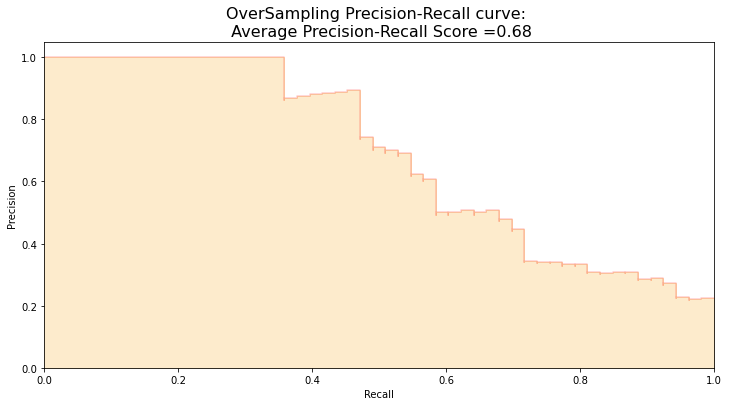

In [55]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [56]:
# Teknik SMOTE (OverSampling) setelah splitting dan Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Implementasi pada data asli 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [57]:
# Implementasi GridSearchCV dan model lainnya

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.02247476577758789 sec


In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Logistic Regression di-"fit" menggunakan teknik SMOTE
y_pred_log_reg = log_reg_sm.predict(X_test)

# Model lain di-"fit" menggunakan UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        51
         1.0       1.00      0.98      0.99        53

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

KNears Neighbors:
              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75        51
         1.0       0.78      0.72      0.75        53

    accuracy                           0.75       104
   macro avg       0.75      0.75      0.75       104
weighted avg       0.75      0.75      0.75       104

Support Vector Classifier:
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        51
         1.0       0.95      0.98      0.96        53

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted

In [59]:
# Skor akhir pada data tes dari logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression dengan Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression dengan teknik SMOTE
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Tampilkan tabel skor
final_df

,Technique,Score
0,Random UnderSampling,0.990385
1,Oversampling (SMOTE),0.714744


# Model Test Data & Confident Score

In [60]:
# Melakukan Undersample ketika cross validating
undersample_X = new_df[["Berat Lahir (kg)", "Berat (kg)", "Tinggi (cm)", "Pendidikan Ayah", "Pendidikan Ibu", "Pekerjaan Ibu", "Air", "xprotein", "pce"]]
undersample_y = new_df['Status Stunting']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Mengimplementasikan teknik NearMiss 
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)

# Melakukan Cross Validating
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE terjadi saat Cross Validation, bukan sebelumnya
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

In [90]:
#Buat data untuk testing confidence score berdasarkan variabel hasil PCA
testing_data = [["3.5", "13.6", "92.1", "5", "12", "1", "0", "1500000", "1200000"],
                ["2.9", "7.2", "84.3", "10", "12", "1", "0", "550000", "550000"],
                ["2.5", "13.6", "92.1", "5", "12", "1", "0", "350000", "250000"],
                ["2.5", "8.6", "80.1", "15", "12", "1", "1", "1350000", "1250000"]
               ]
                
data_predict = pd.DataFrame(testing_data, index=["data 1", "data 2", "data 3", "data 4"], columns=undersample_X.columns)
data_predict

,Berat Lahir (kg),Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ibu,Air,xprotein,pce
data 1,3.5,13.6,92.1,5,12,1,0,1500000,1200000
data 2,2.9,7.2,84.3,10,12,1,0,550000,550000
data 3,2.5,13.6,92.1,5,12,1,0,350000,250000
data 4,2.5,8.6,80.1,15,12,1,1,1350000,1250000


In [91]:
#from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_predict2  = scaler.fit_transform(data_predict)
data_predict2_df = pd.DataFrame(data_predict2, index=["data 1", "data 2", "data 3", "data 4"], columns=undersample_X.columns)
data_predict2_df

,Berat Lahir (kg),Berat (kg),Tinggi (cm),Pendidikan Ayah,Pendidikan Ibu,Pekerjaan Ibu,Air,xprotein,pce
data 1,1.454545,0.467290,0.440678,-0.4,0.0,0.0,0.0,0.619718,0.440678
data 2,0.363636,-0.728972,-0.440678,0.4,0.0,0.0,0.0,-0.450704,-0.440678
data 3,-0.363636,0.467290,0.440678,-0.4,0.0,0.0,0.0,-0.676056,-0.847458
data 4,-0.363636,-0.467290,-0.915254,1.2,0.0,0.0,4.0,0.450704,0.508475


In [92]:
prediksi = undersample_model.predict(data_predict2)
conf_score = undersample_model.predict_proba(data_predict2)

print(prediksi)
print(conf_score)

[0. 1. 0. 1.]
[[0.93339879 0.06660121]
 [0.47400603 0.52599397]
 [0.8007613  0.1992387 ]
 [0.14904407 0.85095593]]


In [86]:
for i in range(len(prediksi)):
    if prediksi[i] == 0:
        print("Anak Anda pada data", i+1, round((100*conf_score[i,0]), 2), "% berpeluang tidak mengalami stunting")
    else:
        print("Anak Anda pada data", i+1, round((100*conf_score[i,1]), 2), "% berpeluang mengalami stunting")

Anak Anda pada data 1 92.46 % berpeluang tidak mengalami stunting
Anak Anda pada data 2 50.85 % berpeluang mengalami stunting
Anak Anda pada data 3 93.05 % berpeluang mengalami stunting
Anak Anda pada data 4 93.65 % berpeluang tidak mengalami stunting


# GUI DEMO

In [82]:
from tkinter import *
import tkinter.font

root = Tk()
root.geometry("420x700")

changefont = tkinter.font.Font(size=20)
judul = Label(root, text = "Prediksi DETEKSI STUNTING", font=changefont)
judul.place(x=20, y=10)

labelfr = LabelFrame(root, text = "result",padx=20,pady=20)
labelfr.place(x=100, y=450)

berat_lahir = Label(root, text = "Berat Lahir (kg)")
berat = Label(root, text = "Berat (kg)")
tinggi = Label(root, text = "Tinggi (cm)")
pend_ayah = Label(root, text = "Tahun Pendidikan Ayah")
pend_ibu = Label(root, text = "Tahun Pendidikan Ibu")
kerja = Label(root, text = "Apakah Ibu Bekerja? (1=Ya, 0=Tidak)")
air = Label(root, text = "Apakah sumber air terlindungi? (1=Ya, 0=Tidak)")
xprotein = Label(root, text = "Total pengeluaran untuk Protein (Rp)")
pce = Label(root, text = "Total pengeluaran untuk kesehatan & pendidikan (Rp)")

e1 = Entry(root)
e2 = Entry(root)
e3 = Entry(root)
e4 = Entry(root)
e5 = Entry(root)
e6 = Entry(root)
e7 = Entry(root)
e8 = Entry(root)
e9 = Entry(root)

berat_lahir.place(x = 20, y = 50)
berat.place(x = 20, y = 90)
tinggi.place(x = 20, y = 130)
pend_ayah.place(x = 20, y = 170)
pend_ibu.place(x = 20, y = 210)
kerja.place(x = 20, y = 250)
air.place(x = 20, y = 290)
xprotein.place(x = 20, y = 330)
pce.place(x = 20, y = 370)

e1.place(x = 20, y = 70)
e2.place(x = 20, y = 110)
e3.place(x = 20, y = 150)
e4.place(x = 20, y = 190)
e5.place(x = 20, y = 230)
e6.place(x = 20, y = 270)
e7.place(x = 20, y = 310)
e8.place(x = 20, y = 350)
e9.place(x = 20, y = 390)

def cetak():
    class anak:
        def __init__(self,berat_lahir,berat,tinggi,pend_ayah,pend_ibu,kerja,air,xprotein,pce):
            self.berat_lahir = berat_lahir
            self.berat = berat
            self.tinggi = tinggi
            self.pend_ayah = pend_ayah
            self.pend_ibu = pend_ibu
            self.kerja = kerja
            self.air = air
            self.xprotein = xprotein
            self.pce = pce
        def model(self):
            data = [[self.berat_lahir, self.berat, self.tinggi, self.pend_ayah, self.pend_ibu, self.kerja,
                     self.air, self.xprotein, self.pce]]
            data = scaler.fit_transform(data)
            data_df = pd.DataFrame(data)
            prediksi = undersample_model.predict(data_df)
            conf_score = undersample_model.predict_proba(data_df)
            
            lbl1 = Label(labelfr, text="Anak Anda berpeluang \n").grid()
            lbl2 = Label(labelfr, text=100*conf_score[:,1]).grid()
            lbl3 = Label(labelfr, text="%").grid()
            lbl4 = Label(labelfr, text="\nterkena stunting").grid()
            #lbl = Label(labelfr, text="Anak Anda "+(100*conf_score[:,1])+"% berpeluang tidak mengalami stunting").grid()
            #else:
            #    lbl2 = Label(labelfr, text="Anak Anda pada data"+(100*conf_score[:,1])+"% berpeluang mengalami stunting").grid()
            
    ditampilkan = anak(float(e1.get()),float(e2.get()),float(e3.get()),float(e4.get()),float(e5.get()),
                       float(e6.get()),float(e7.get()),float(e8.get()),float(e9.get()))
    ditampilkan.model()

btn = Button(root, text = "Submit", command=cetak).place(x = 170, y = 420)

root.mainloop()
